<a href="https://colab.research.google.com/github/ShawneilRodrigues/cats_Dogs_classification/blob/main/cats_Dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/salader/dogs-vs-cats/data'
od.download(dataset_url)

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:12<00:00, 94.8MB/s]


In [2]:
import os
data_dir = './dogs-vs-cats'
os.listdir(data_dir)

['dogs_vs_cats', 'test', 'train']

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [4]:
train_df=keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_df=keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
#def process(image,label):
#  image=tf.cast(image/255. ,tf.float32)
#  return image,label
#train_df=train_df.map(process)
#validation_df=validation_df.map(process)

In [9]:
batch_size=16
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory('/content/dogs-vs-cats/train',target_size=(200,200),batch_size=batch_size,class_mode='binary')
test_generator=test_datagen.flow_from_directory('/content/dogs-vs-cats/test',target_size=(200,200),batch_size=batch_size,class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [15]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 198, 198, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 97, 97, 64)        256       
 chNormalization)                                                
                                                      

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history=model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=10,validation_data=test_generator,validation_steps=len(test_generator))

Epoch 1/10


<ipython-input-18-e18ce8a9055e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=10,validation_data=test_generator,validation_steps=len(test_generator))


1250/1250 [==============================] - 225s 175ms/step - loss: 1.0919 - accuracy: 0.5939 - val_loss: 0.6856 - val_accuracy: 0.6012
Epoch 2/10
1250/1250 [==============================] - 218s 174ms/step - loss: 0.5972 - accuracy: 0.6781 - val_loss: 0.5431 - val_accuracy: 0.7404
Epoch 3/10
1250/1250 [==============================] - 216s 173ms/step - loss: 0.5069 - accuracy: 0.7521 - val_loss: 0.4453 - val_accuracy: 0.7918
Epoch 4/10
1250/1250 [==============================] - 217s 174ms/step - loss: 0.4506 - accuracy: 0.7873 - val_loss: 0.5075 - val_accuracy: 0.7652
Epoch 5/10
1250/1250 [==============================] - 218s 174ms/step - loss: 0.3996 - accuracy: 0.8225 - val_loss: 0.3947 - val_accuracy: 0.8270
Epoch 6/10
1250/1250 [==============================] - 216s 173ms/step - loss: 0.3653 - accuracy: 0.8384 - val_loss: 0.4048 - val_accuracy: 0.8210
Epoch 7/10
1250/1250 [==============================] - 216s 173ms/step - loss: 0.3206 - accuracy: 0.8600 - val_loss: 0.419

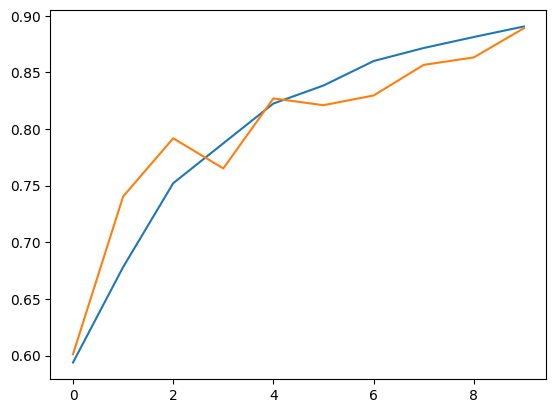

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


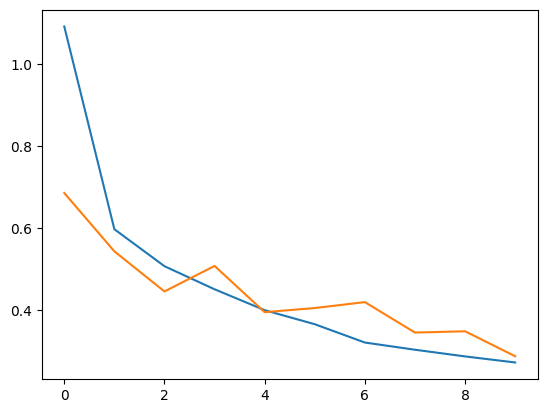

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [22]:
import cv2
test_img=cv2.imread('/content/IMG_9143.JPG')


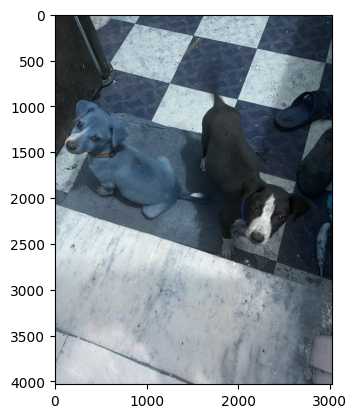

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape

(4032, 3024, 3)

In [28]:
test_img=cv2.resize(test_img,(200,200))

In [30]:
test_input=test_img.reshape((1,200,200,3))

In [31]:
model.predict(test_input)

1/1 [==============================] - 0s 349ms/step


array([[1.]], dtype=float32)